In [8]:
%pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB 1.3 MB/s eta 0:00:20
   ---------------------------------------- 0.3/25.6 MB 3.4 MB/s eta 0:00:08
   - -------------------------------------- 0.7/25.6 MB 6.6 MB/s eta 0:00:04
   --- ------------------------------------ 2.0/25.6 MB 11.3 MB/s eta 0:00:03
   ----- ---------------------------------- 3.5/25.6 MB 15.9 MB/s eta 0:00:02
   ------- -------------------------------- 4.6/25.6 MB 17.3 MB/s eta 0:00:02
   -------- ------------------------------- 5.7/25.6 MB 19.3 MB/s eta 0:00:02
   ----------- ---------------------------- 7.2/25.6 MB 20.8 MB/s eta 0:00:01
   ------------ --------------------------- 7.9/25.6 MB 20.1 MB/s eta 0:00:01
   -------------- ------------------------- 9.0/25.6 MB 19.8 MB/s eta 0:00:01
   ---------------- ----------------------- 10.6/25.6 MB 24.3 MB/s eta 0:00:01
   ------------------ --------------------- 12.0/25.6 MB 27.3 MB/s eta 0:0

In [9]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import squarify 
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from pywaffle import Waffle

from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap


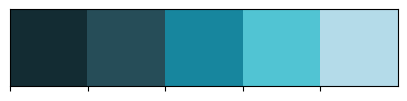

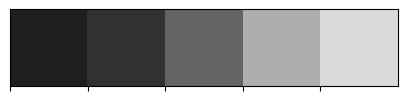

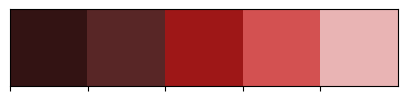

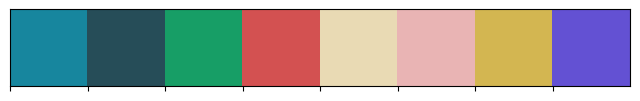

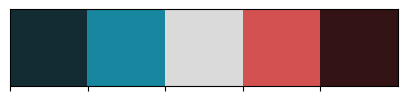

In [25]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [20]:
df = pd.read_csv("data/NetflixOriginals.csv", encoding='latin-1')
df.head(25)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,05-Aug-19,58,2.5,English/Japanese
1,Dark Forces,Thriller,21-Aug-20,81,2.6,Spanish
2,The App,Science fiction/Drama,26-Dec-19,79,2.6,Italian
3,The Open House,Horror thriller,19-Jan-18,94,3.2,English
4,Kaali Khuhi,Mystery,30-Oct-20,90,3.4,Hindi
5,Drive,Action,01-Nov-19,147,3.5,Hindi
6,Leyla Everlasting,Comedy,04-Dec-20,112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,05-Jun-20,149,3.7,English
8,Paradox,Musical/Western/Fantasy,23-Mar-18,73,3.9,English
9,Sardar Ka Grandson,Comedy,18-May-21,139,4.1,Hindi


In [16]:
print(df['Runtime'].dtype)


int64


In [17]:
print(df['Genre'].unique())


['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' 'Mockumentary' 'Satire' 'One-man s

In [22]:
imr = df.groupby("Genre", as_index=False)['Runtime'].mean().sort_values(by="Runtime", ascending=False).reset_index(drop=True)


In [23]:
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, 10 , endpoint=False)

# Cumulative length
LENGTHS = imr.iloc[0:10,1].values

# Genre label
GENRE = imr["Genre"].iloc[0:10].values

In [26]:
# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=LENGTHS.min(), vmax=LENGTHS.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(LENGTHS))

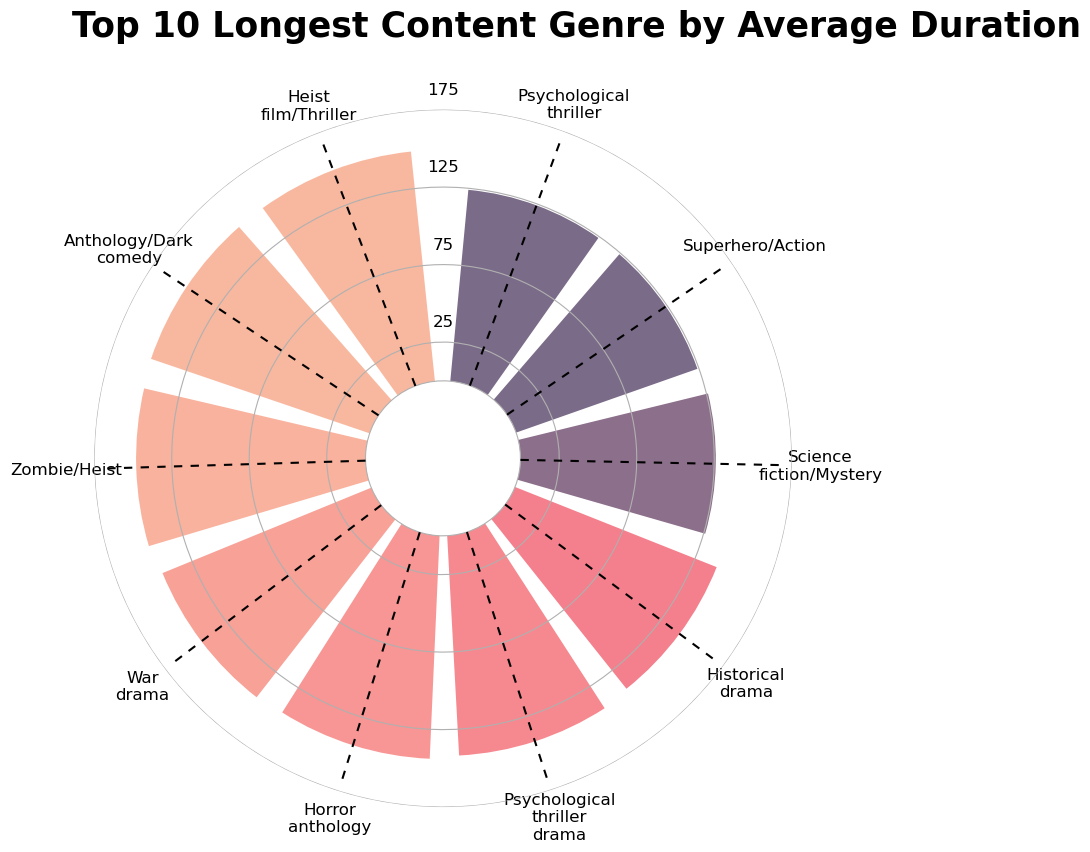

In [29]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-50, 175)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
bars = ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52)
# ax.bar_label(bars,label_type="edge",fontsize=16)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 170, color="black", ls=(0, (4, 4)))

# Remove lines for polar axis (x)
ax.xaxis.grid(False)
# ax.yaxis.grid(False)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
GENRE = ["\n".join(wrap(r, 5, break_long_words=False)) for r in GENRE]
GENRE

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(GENRE, size=12)
# Remove unnecesary guides ---------------------------------------

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0,25, 75, 125, 175])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)


# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 10
ax.text(-0.2 * np.pi / 2, 25 + PAD, "25", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 75 + PAD, "75", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 125 + PAD, "125", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 175 + PAD, "175", ha="center", size=12)
title = "Top 10 Longest Content Genre by Average Duration"
fig.text(0.1, 0.83, title, fontsize=25, weight="bold", ha="left", va="baseline");

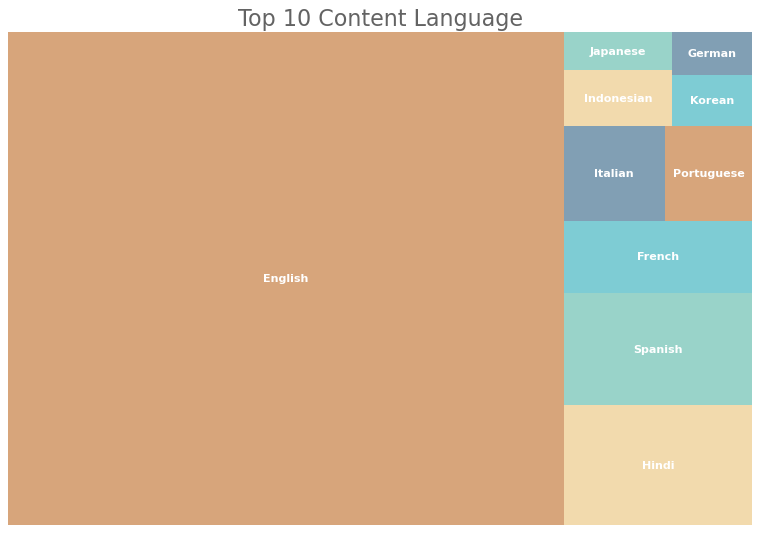

In [32]:
lan = df["Language"].value_counts().iloc[0:10]
labels = lan.index
sizes = lan.values
colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
squarify.plot(sizes=sizes, label=labels,color=colors,
              text_kwargs={'fontsize':10,'weight':'bold',"color":"white"}, alpha=.8)

# Decorate
plt.title('Top 10 Content Language',fontsize=20, color=colors_dark[2])
plt.axis('off');